In [2]:
import numpy as np

In [9]:
# 示例数据：3行4列的数组（可理解为3个样本，每个样本4个特征）
data = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12]])

total = np.sum(data) # 计算所有元素总和
print(total)
sum_col = np.sum(data,axis=0) #按列求和
print(sum_col) 
sum_row = np.sum(data,axis=1,keepdims=True) #按行求和
print(sum_row)

78
[15 18 21 24]
[[10]
 [26]
 [42]] 
 (3, 1)


In [16]:
# 计算所有元素的均值
mean_total = np.mean(data)
print("所有元素均值：", mean_total)  # 输出 6.5（78/12）

# 按列求均值（每个特征的平均）
mean_col = np.mean(data, axis=0)
print("按列均值：",mean_col)  # 输出 [5. 6. 7. 8.]（15/3=5，18/3=6，等）

# 按行求均值（每个样本的平均）
mean_row = np.mean(data, axis=1)
print("按行均值：",mean_row)  # 输出 [2.5  6.5 10.5]（10/4=2.5，等）

所有元素均值： 6.5
按列均值： [5. 6. 7. 8.]
按行均值： [ 2.5  6.5 10.5]


In [17]:
# 示例数据（含极端值）
data_with_outlier = np.array([1, 2, 3, 4, 100])

# 均值 vs 中位数（对比极端值的影响）
print("均值（受极端值影响大）：", np.mean(data_with_outlier))  # 输出 22.0
print("中位数（抗极端值）：", np.median(data_with_outlier))    # 输出 3.0

# 二维数组按列求中位数
median_col = np.median(data, axis=0)
print("按列中位数：", median_col)  # 输出 [5. 6. 7. 8.]（和均值相同，因数据对称）

均值（受极端值影响大）： 22.0
中位数（抗极端值）： 3.0
按列中位数： [5. 6. 7. 8.]


In [20]:
# 示例：两组数据的离散程度对比
data1 = np.array([1, 2, 3, 4, 5])  # 集中
data2 = np.array([1, 3, 5, 7, 9])  # 分散

print("data1标准差：", np.std(data1))  # 输出 1.414（偏离小）
print("data2标准差：", np.std(data2))  # 输出 2.828（偏离大）

# 样本方差（ddof=1）：用于样本估计总体时，修正偏差
sample_data = np.array([1, 2, 3])
pop_var = np.var(sample_data, ddof=0)  # 总体方差：((1-2)²+(2-2)²+(3-2)²)/3 ≈ 0.667
sam_var = np.var(sample_data, ddof=1)  # 样本方差：同上，但除以2 → 1.0
print("总体方差 vs 样本方差：", pop_var, sam_var)

data1标准差： 1.4142135623730951
data2标准差： 2.8284271247461903
总体方差 vs 样本方差： 0.6666666666666666 1.0


In [25]:
# 最大值和最小值
print("最大值：", np.max(data))  # 输出 12
print("最小值：", np.min(data))  # 输出 1

# 按行找最大值（每个样本的最大特征）
max_row = np.max(data, axis=1)
print("每行最大值：", max_row)  # 输出 [4 8 12]

# 极差
print("极差：", np.ptp(data))  # 输出 11（12-1）

最大值： 12
最小值： 1
每行最大值： [ 4  8 12]
极差： 11


In [30]:
# 示例数据（10个元素）
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 计算四分位数（常用统计量）
p25 = np.percentile(data, 25)  # 下四分位（25%位置）
p50 = np.percentile(data, 50)  # 中位数
p75 = np.percentile(data, 75)  # 上四分位
print("25%分位数：", p25)  # 输出 3.25（不同版本可能有细微差异，核心是分位置）
print("50%分位数：", p50)  # 输出 5.5
print("75%分位数：", p75)  # 输出 7.75

# 箱线图的5个关键分位数（0,25,50,75,100）
box_stats = np.percentile(data, [0, 25, 50, 75, 100])
print("箱线图统计量：", box_stats) 

25%分位数： 3.25
50%分位数： 5.5
75%分位数： 7.75
箱线图统计量： [ 1.    3.25  5.5   7.75 10.  ]


In [35]:
# 示例：两个变量（特征）的协方差
# 变量x：[1,2,3,4,5]，变量y：[2,4,5,4,5]（大致正相关）
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
data_cov = np.vstack([x, y])  # 按行堆叠（每行一个变量）

cov_matrix = np.cov(data_cov)
print("协方差矩阵：\n", cov_matrix)
# 输出：
# [[2.5  2. ]   → 第1行：x的方差（2.5），x与y的协方差（2.0）
#  [2.   1.6]]  → 第2行：y与x的协方差（2.0），y的方差（1.6）
# 结论：x和y正相关（协方差为正） 为0不相关，为负是否为负相关
corr_matrix = np.corrcoef(data_cov)
print(corr_matrix)

协方差矩阵：
 [[2.5 1.5]
 [1.5 1.5]]
[[1.         0.77459667]
 [0.77459667 1.        ]]


[  1   3   3  15  19  55  67  74 112 104 129 120  92  80  53  35  19  12
   5   2]
[-3.30304177 -2.98291539 -2.66278901 -2.34266263 -2.02253625]


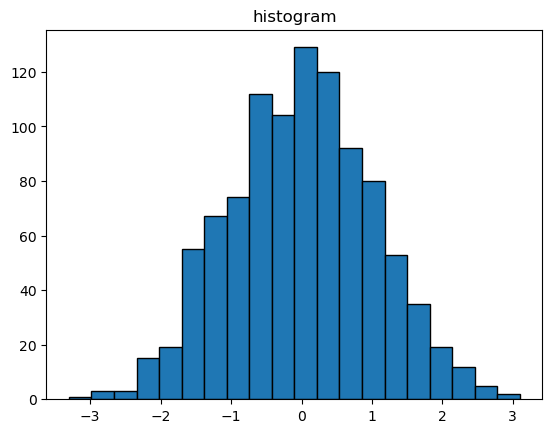

In [40]:
normal_data = np.random.randn(1000)
counts,bins = np.histogram(normal_data,bins=20)
print(counts)
print(bins[:5])
import matplotlib.pyplot as plt
plt.hist(normal_data,bins=20,edgecolor='black')
plt.title("histogram") #正太分布直方图，无法使用汉字？
plt.show()

In [43]:
# 含缺失值的数据
data_with_nan = np.array([1, 2, np.nan, 4, 5])
# 普通mean返回nan，nanmean自动忽略nan
print("普通均值（含nan）：", np.mean(data_with_nan))  # 输出 nan
print("忽略nan的均值：", np.nanmean(data_with_nan))  # 输出 3.0（(1+2+4+5)/4）

# 其他常用nan函数
print("忽略nan的中位数：", np.nanmedian(data_with_nan))  # 输出 2.0
print("忽略nan的标准差：", np.nanstd(data_with_nan))      # 输出 1.870...

普通均值（含nan）： nan
忽略nan的均值： 3.0
忽略nan的中位数： 3.0
忽略nan的标准差： 1.5811388300841898


In [46]:
# 假设CSV文件内容：
# 1,2,
# 4,,6
# （第1行第3列、第2行第2列是空值）
import pandas as pd
data = pd.read_csv(r"C:\Users\77386\Downloads\Iris.csv").to_numpy()  # 转换为NumPy数组
print(data)

[[1 5.1 3.5 1.4 0.2 'Iris-setosa']
 [2 4.9 3.0 1.4 0.2 'Iris-setosa']
 [3 4.7 3.2 1.3 0.2 'Iris-setosa']
 [4 4.6 3.1 1.5 0.2 'Iris-setosa']
 [5 5.0 3.6 1.4 0.2 'Iris-setosa']
 [6 5.4 3.9 1.7 0.4 'Iris-setosa']
 [7 4.6 3.4 1.4 0.3 'Iris-setosa']
 [8 5.0 3.4 1.5 0.2 'Iris-setosa']
 [9 4.4 2.9 1.4 0.2 'Iris-setosa']
 [10 4.9 3.1 1.5 0.1 'Iris-setosa']
 [11 5.4 3.7 1.5 0.2 'Iris-setosa']
 [12 4.8 3.4 1.6 0.2 'Iris-setosa']
 [13 4.8 3.0 1.4 0.1 'Iris-setosa']
 [14 4.3 3.0 1.1 0.1 'Iris-setosa']
 [15 5.8 4.0 1.2 0.2 'Iris-setosa']
 [16 5.7 4.4 1.5 0.4 'Iris-setosa']
 [17 5.4 3.9 1.3 0.4 'Iris-setosa']
 [18 5.1 3.5 1.4 0.3 'Iris-setosa']
 [19 5.7 3.8 1.7 0.3 'Iris-setosa']
 [20 5.1 3.8 1.5 0.3 'Iris-setosa']
 [21 5.4 3.4 1.7 0.2 'Iris-setosa']
 [22 5.1 3.7 1.5 0.4 'Iris-setosa']
 [23 4.6 3.6 1.0 0.2 'Iris-setosa']
 [24 5.1 3.3 1.7 0.5 'Iris-setosa']
 [25 4.8 3.4 1.9 0.2 'Iris-setosa']
 [26 5.0 3.0 1.6 0.2 'Iris-setosa']
 [27 5.0 3.4 1.6 0.4 'Iris-setosa']
 [28 5.2 3.5 1.5 0.2 'Iris-setosa']
 

In [3]:
data = np.array([1, 2, 3, 1000, 5],dtype=float)  # 1000是异常值
data[data > 100] = np.nan  # 用nan标记异常值
print(data)  # 输出 [  1.   2.   3.  nan   5.]
data = np.array([np.nan, np.nan, np.nan])  # 全是缺失值
data_part_nan = np.array([1, np.nan, 3])
print(np.isnan(data))     # 检测

def safe_nanmean(arr, default=0):
    """安全计算含nan数组的均值，全为nan时返回default"""
    if np.isnan(arr).all():  # 检查是否所有元素都是nan
        return default       # 全为nan时返回默认值
    else:
        return np.nanmean(arr)  # 否则正常计算

# 测试全缺失数组
print(safe_nanmean(data))  # 输出 0（无警告）

# 测试含部分缺失的数组
print(safe_nanmean(data_part_nan))  # 输出 2.0（正常计算）

[ 1.  2.  3. nan  5.]
[ True  True  True]
0
2.0


In [5]:
import numpy as np
import warnings

def safe_nanmean_v2(arr, default="错误：全部缺失"):
    with warnings.catch_warnings():
        # 捕获“空切片均值”的警告
        warnings.filterwarnings("error", category=RuntimeWarning, message="Mean of empty slice")
        try:
            return np.nanmean(arr)
        except RuntimeWarning:  # 触发警告时，返回默认值
            return default

# 测试
print(safe_nanmean_v2(np.array([np.nan, np.nan])))  # 输出 0（无警告）
print(safe_nanmean_v2(np.array([2, np.nan, 4])))    # 输出 3.0

错误：全部缺失
3.0
